ANÁLISIS PCA - SISTEMA DE ENTREGAS LOGÍSTICAS

Dimensiones del dataset: (1000, 15)
Registros: 1000 entregas
Variables: 15 características

📋 Columnas del dataset:
 1. Clima
 2. TraficoPico
 3. RiesgoRuta
 4. Distancia_km
 5. TiempoEstimado_min
 6. TiempoReal_min
 7. Demora_min
 8. TipoCarga
 9. Peso_kg
10. ExperienciaConductor_anios
11. AntiguedadCamion_anios
12. FallasMecanicas
13. NivelCombustible_pct
14. HorarioSalida
15. EntregaATiempo

📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Clima                       1000 non-null   int64  
 1   TraficoPico                 1000 non-null   int64  
 2   RiesgoRuta                  1000 non-null   int64  
 3   Distancia_km                1000 non-null   float64
 4   TiempoEstimado_min          1000 non-null   float64
 5   TiempoReal_min    

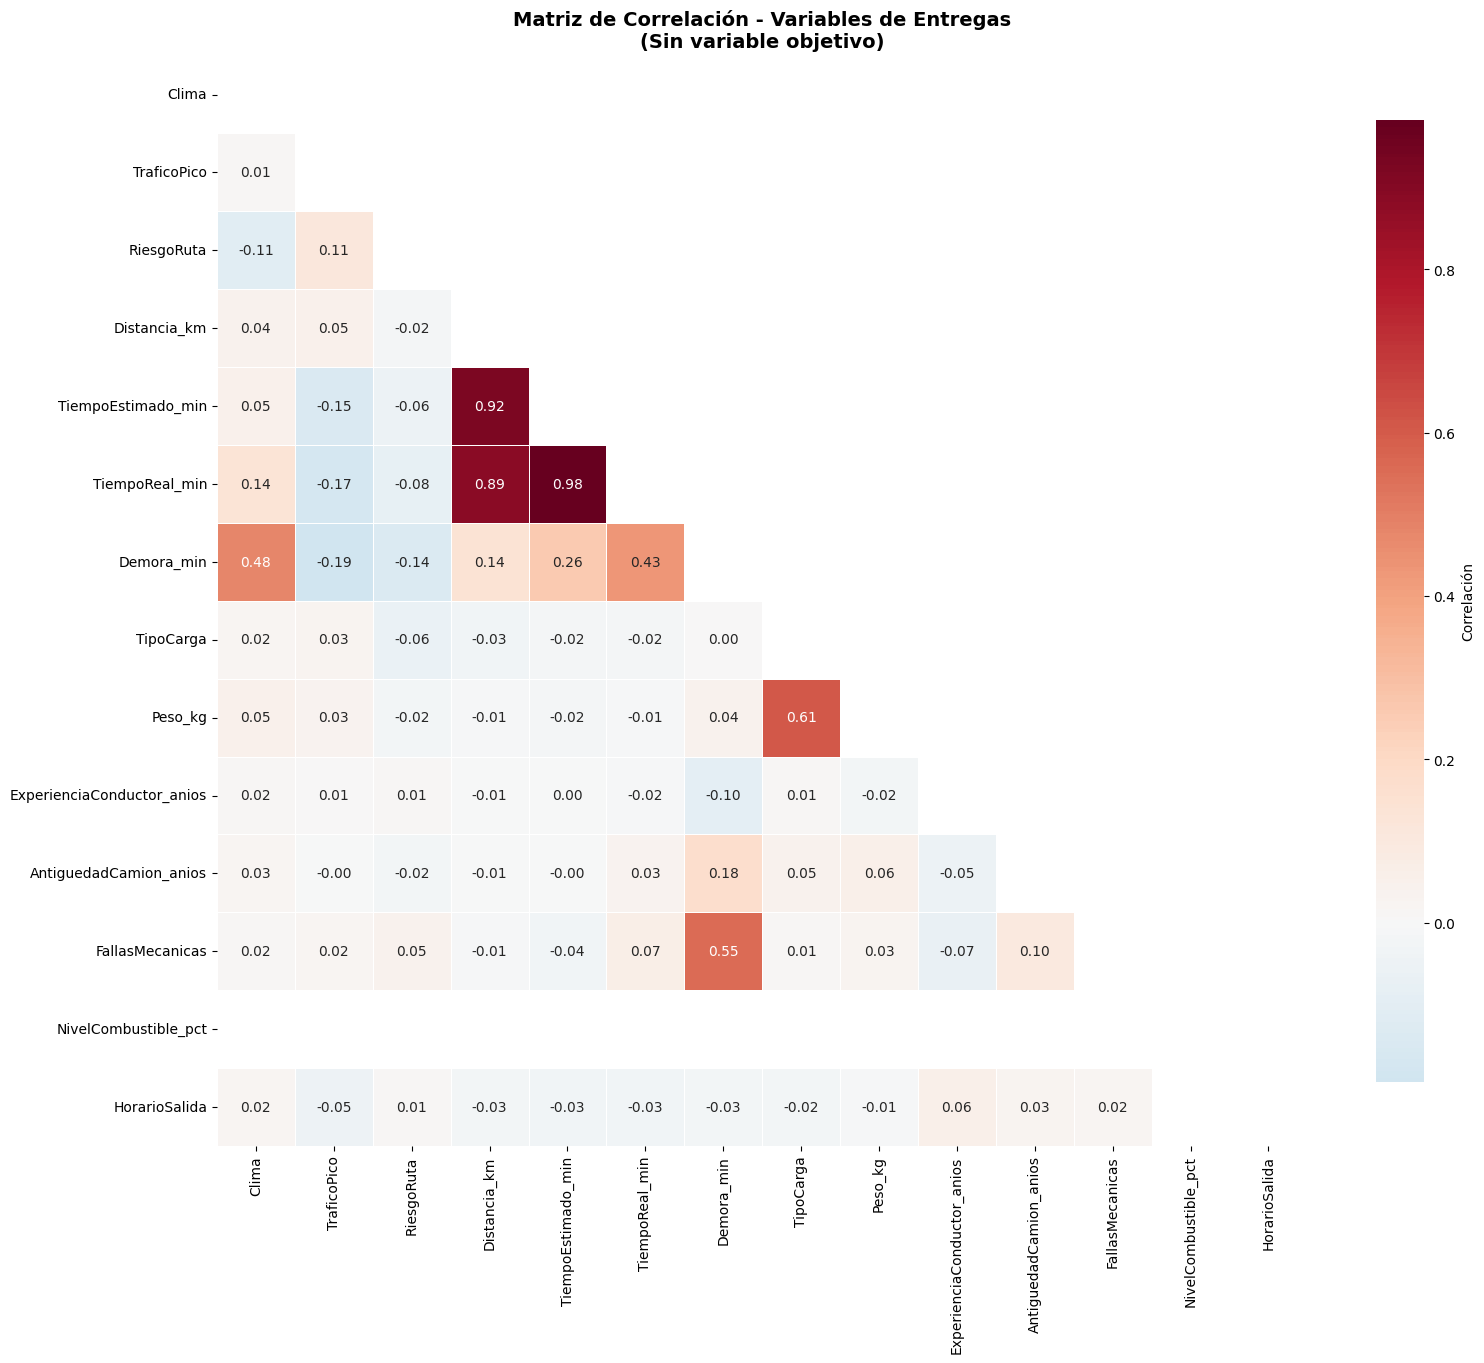


ANÁLISIS DE VARIANZA EXPLICADA
PC 1: 23.56% ███████████          (Acum: 23.56%)
PC 2: 13.65% ██████               (Acum: 37.21%)
PC 3: 12.05% ██████               (Acum: 49.26%)
PC 4:  8.97% ████                 (Acum: 58.23%)
PC 5:  8.10% ████                 (Acum: 66.33%)
PC 6:  7.98% ███                  (Acum: 74.31%)
PC 7:  7.26% ███                  (Acum: 81.57%)
PC 8:  6.90% ███                  (Acum: 88.47%)
PC 9:  6.33% ███                  (Acum: 94.80%)
PC10:  2.99% █                    (Acum: 97.79%)
PC11:  1.76%                      (Acum: 99.55%)
PC12:  0.45%                      (Acum: 100.00%)
PC13:  0.00%                      (Acum: 100.00%)
PC14:  0.00%                      (Acum: 100.00%)

🎯 Componentes necesarios:
   • 80% de varianza: 7 componentes
   • 90% de varianza: 9 componentes
   • 95% de varianza: 10 componentes


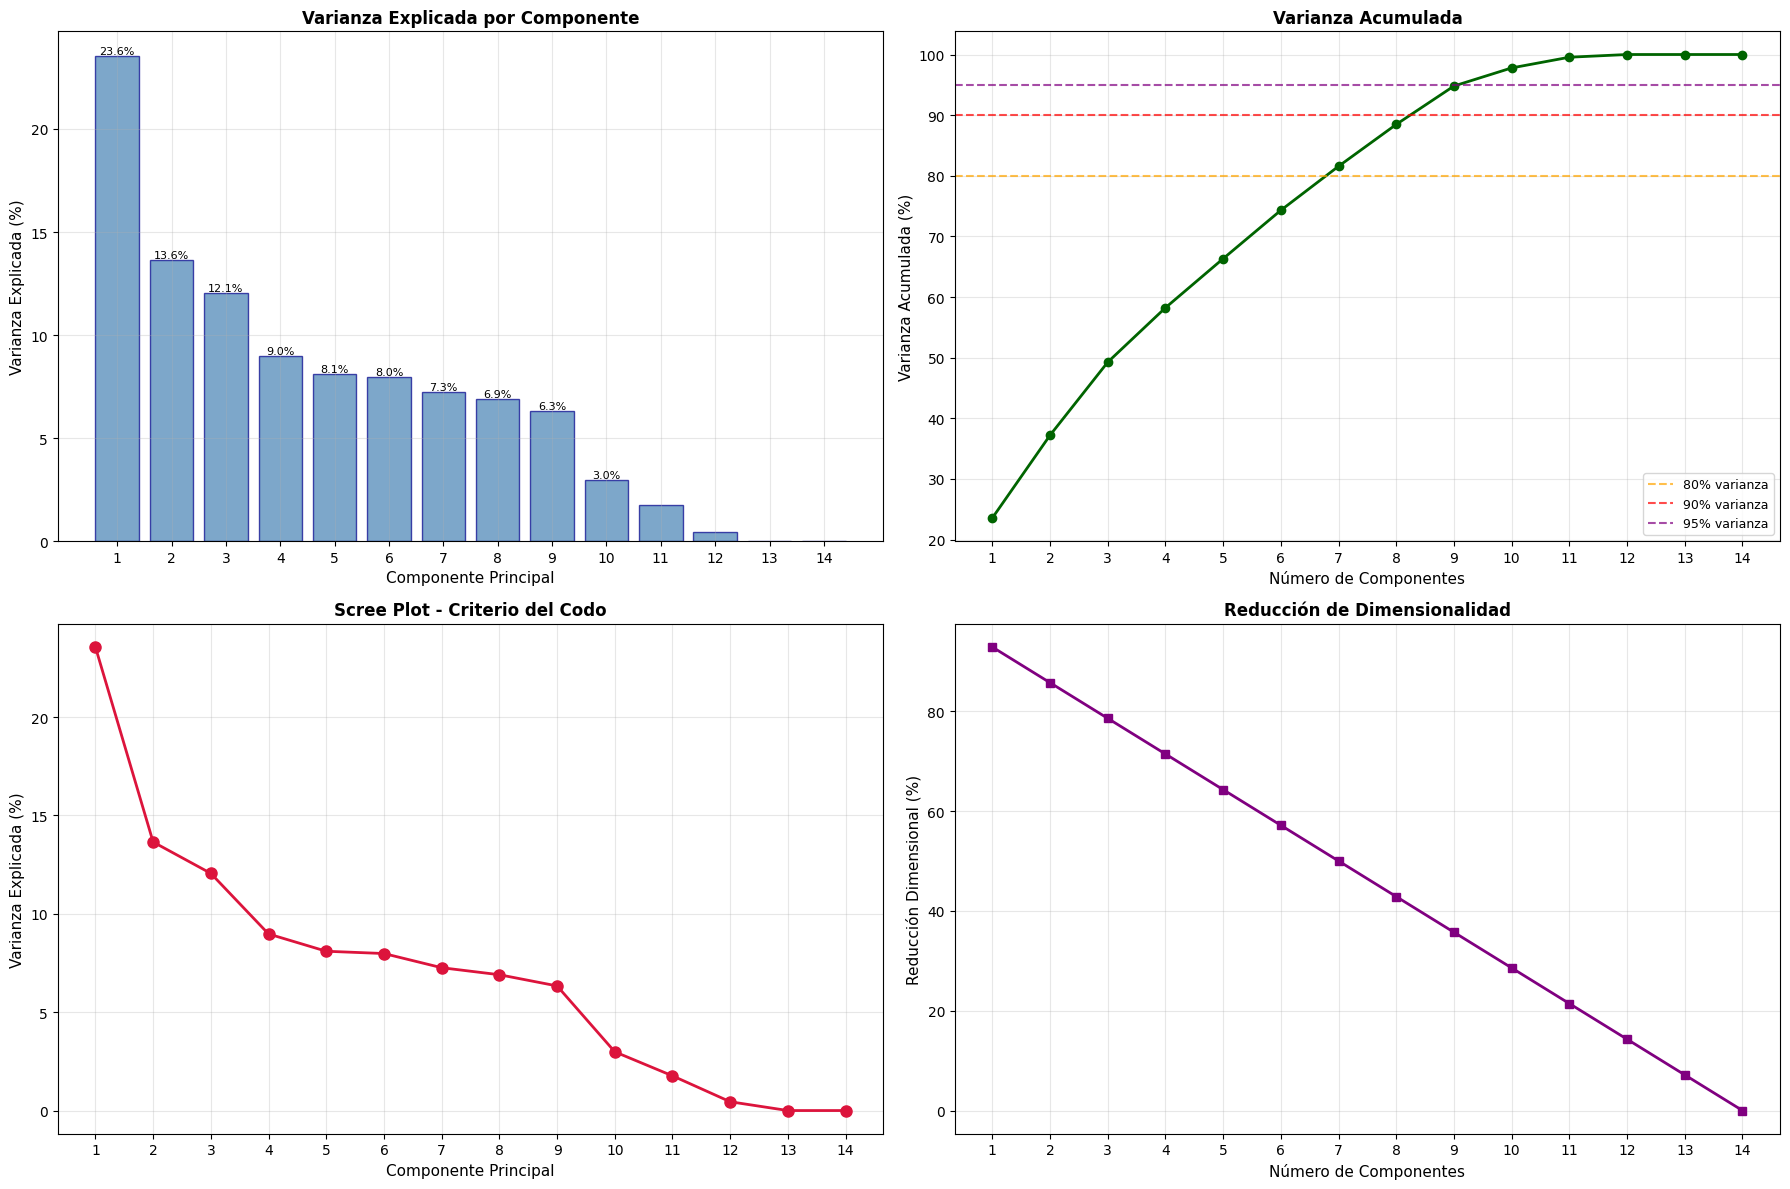


✅ Pipeline optimizado creado con 9 componentes
📊 Dimensiones después de PCA: (1000, 9)
📉 Reducción dimensional: 14 → 9 variables
📈 Reducción: 35.7%

📋 Primeras filas del dataset transformado:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.298169 -1.327760 -1.753449  0.165046  1.025057  0.892791  0.810163   
1  1.421449  2.664182 -0.578222  2.802474  1.509344 -0.317892 -3.341724   
2 -1.228578  1.597014  0.822516 -0.302385  1.258660  1.030363  0.093479   
3  0.950985 -0.651011 -0.577707 -0.046250  1.460307  0.167930  0.137650   
4 -2.482361  0.367936  0.247146  0.415828 -0.674262 -0.060646  0.178577   
5  2.405872  0.625011 -1.508923  0.182928  0.345308 -1.784305  1.802713   
6  2.041815  1.120327  0.057755 -1.921152 -1.178163 -0.737216 -1.089552   
7 -2.223966  1.326479  0.658100  0.747701  0.890561  0.045686  1.171788   
8 -2.714904  0.422416  0.777020  1.120766  0.247470  0.487337  0.335255   
9  1.151195 -1.486794 -0.312663  0.664427 -0.189233 -0.68

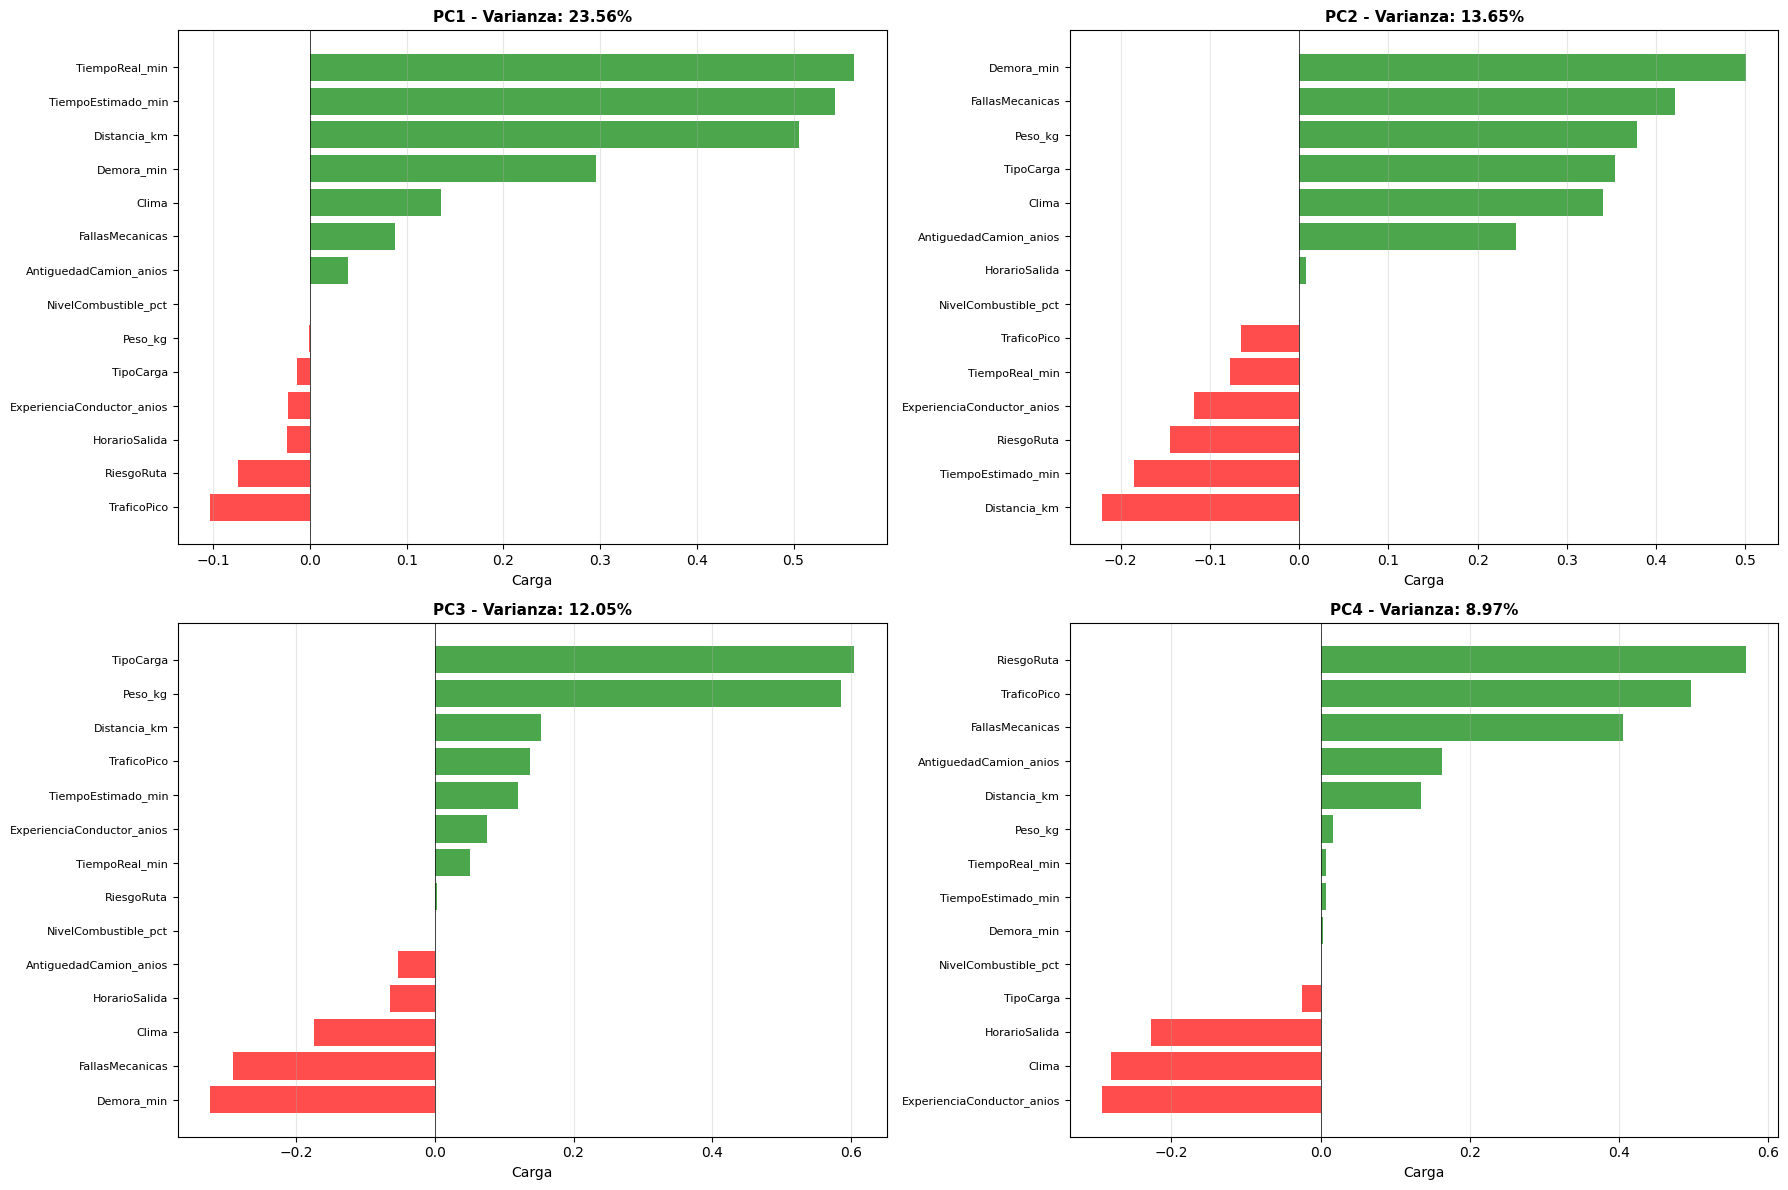

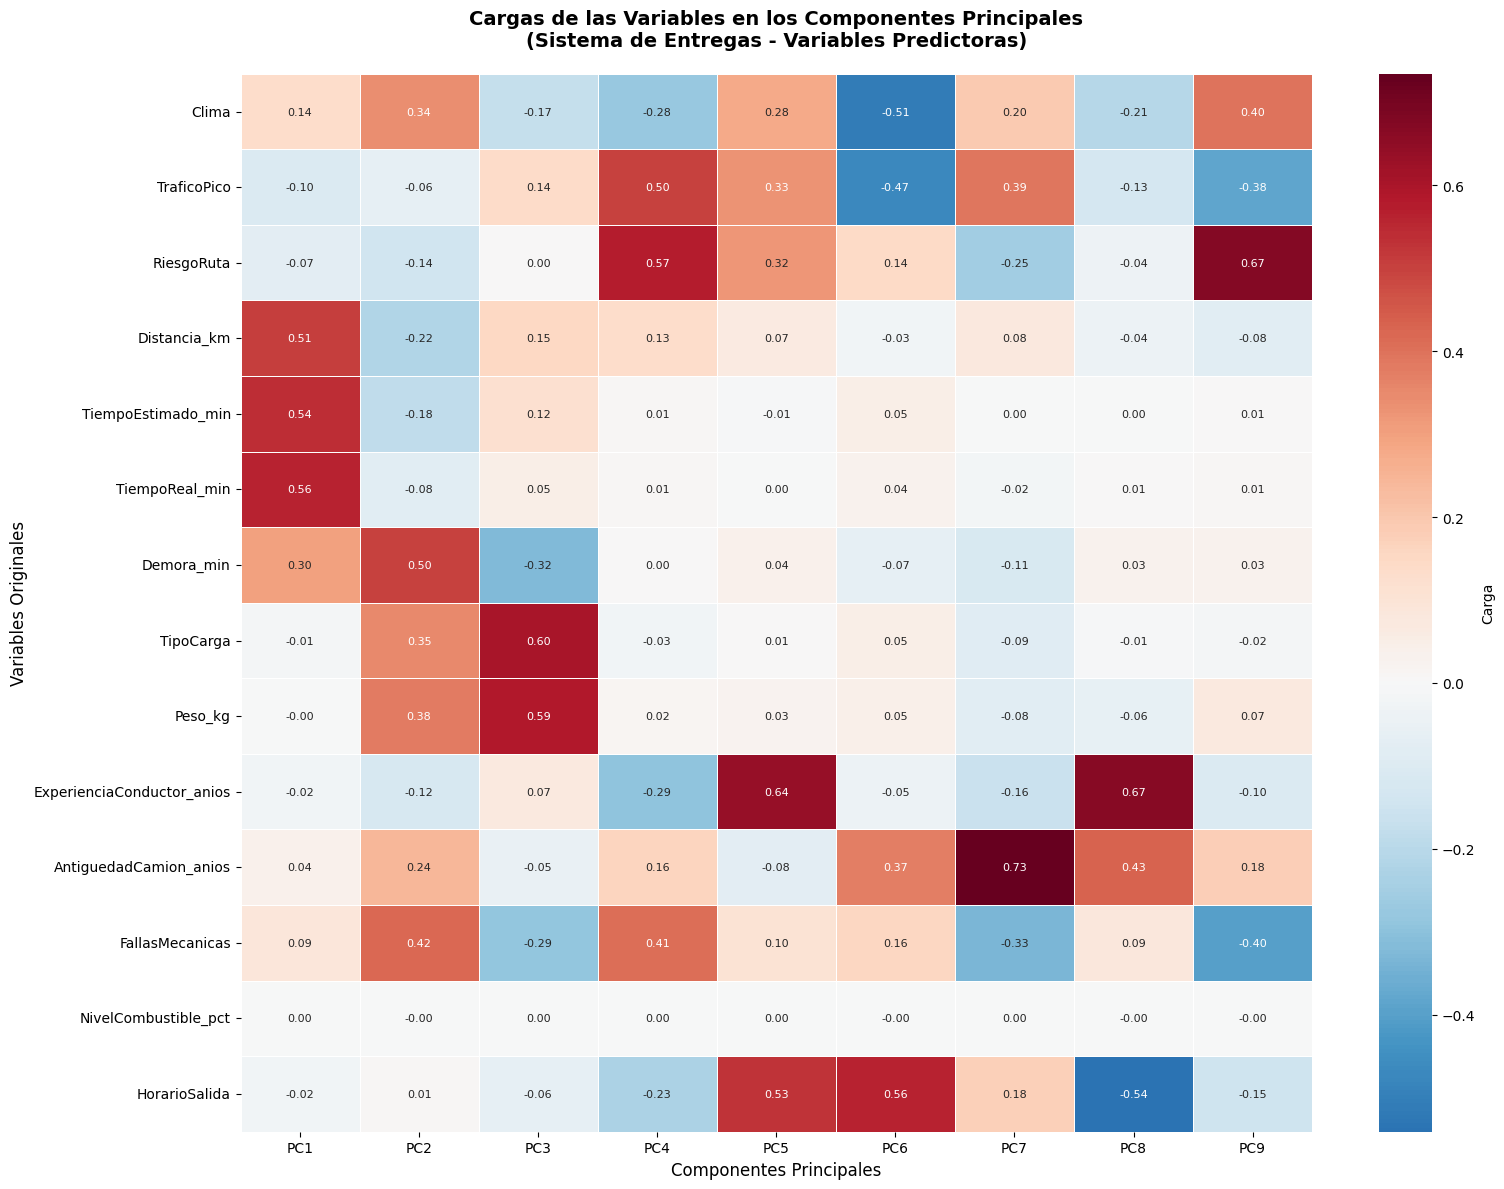

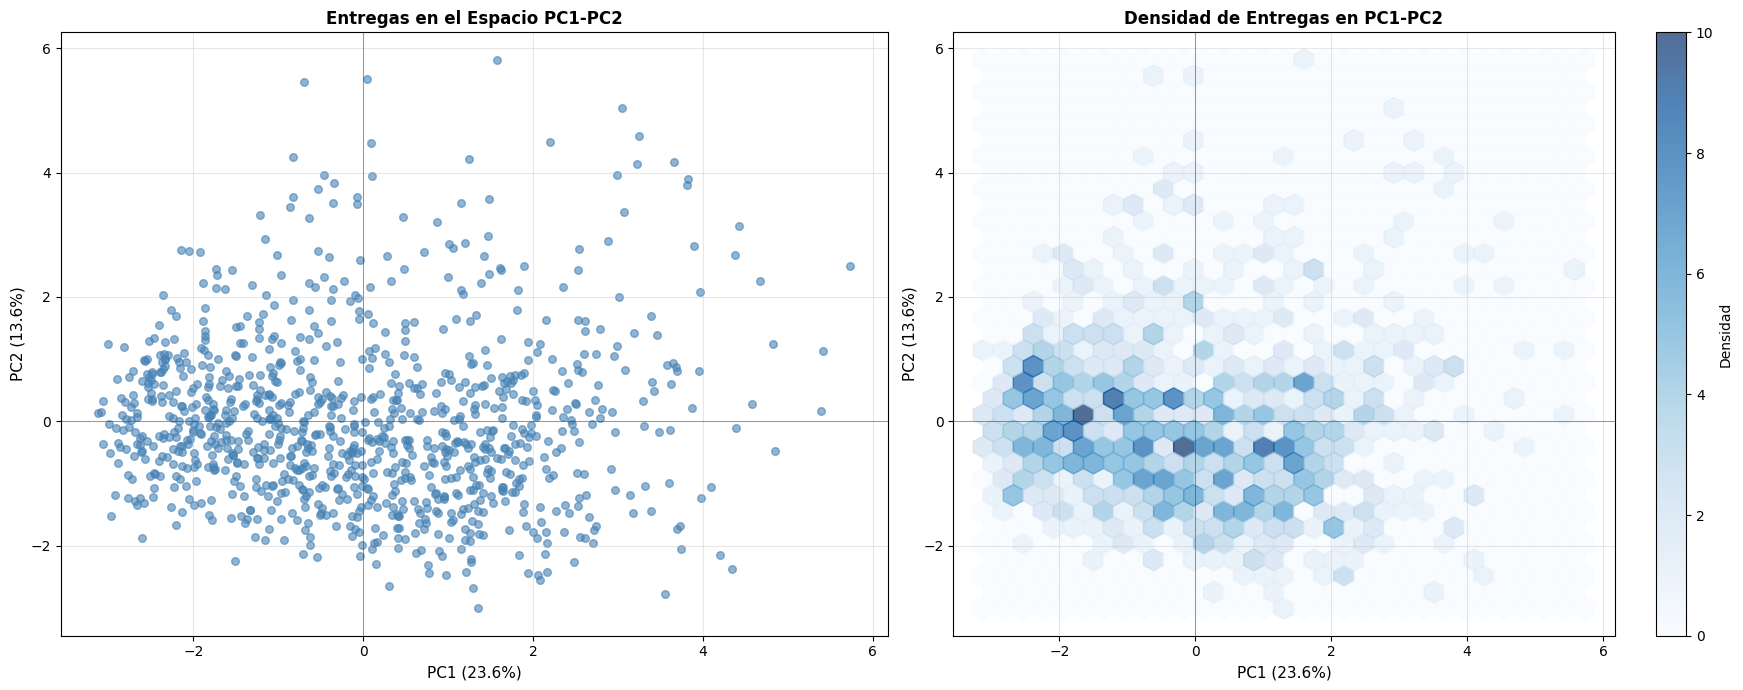

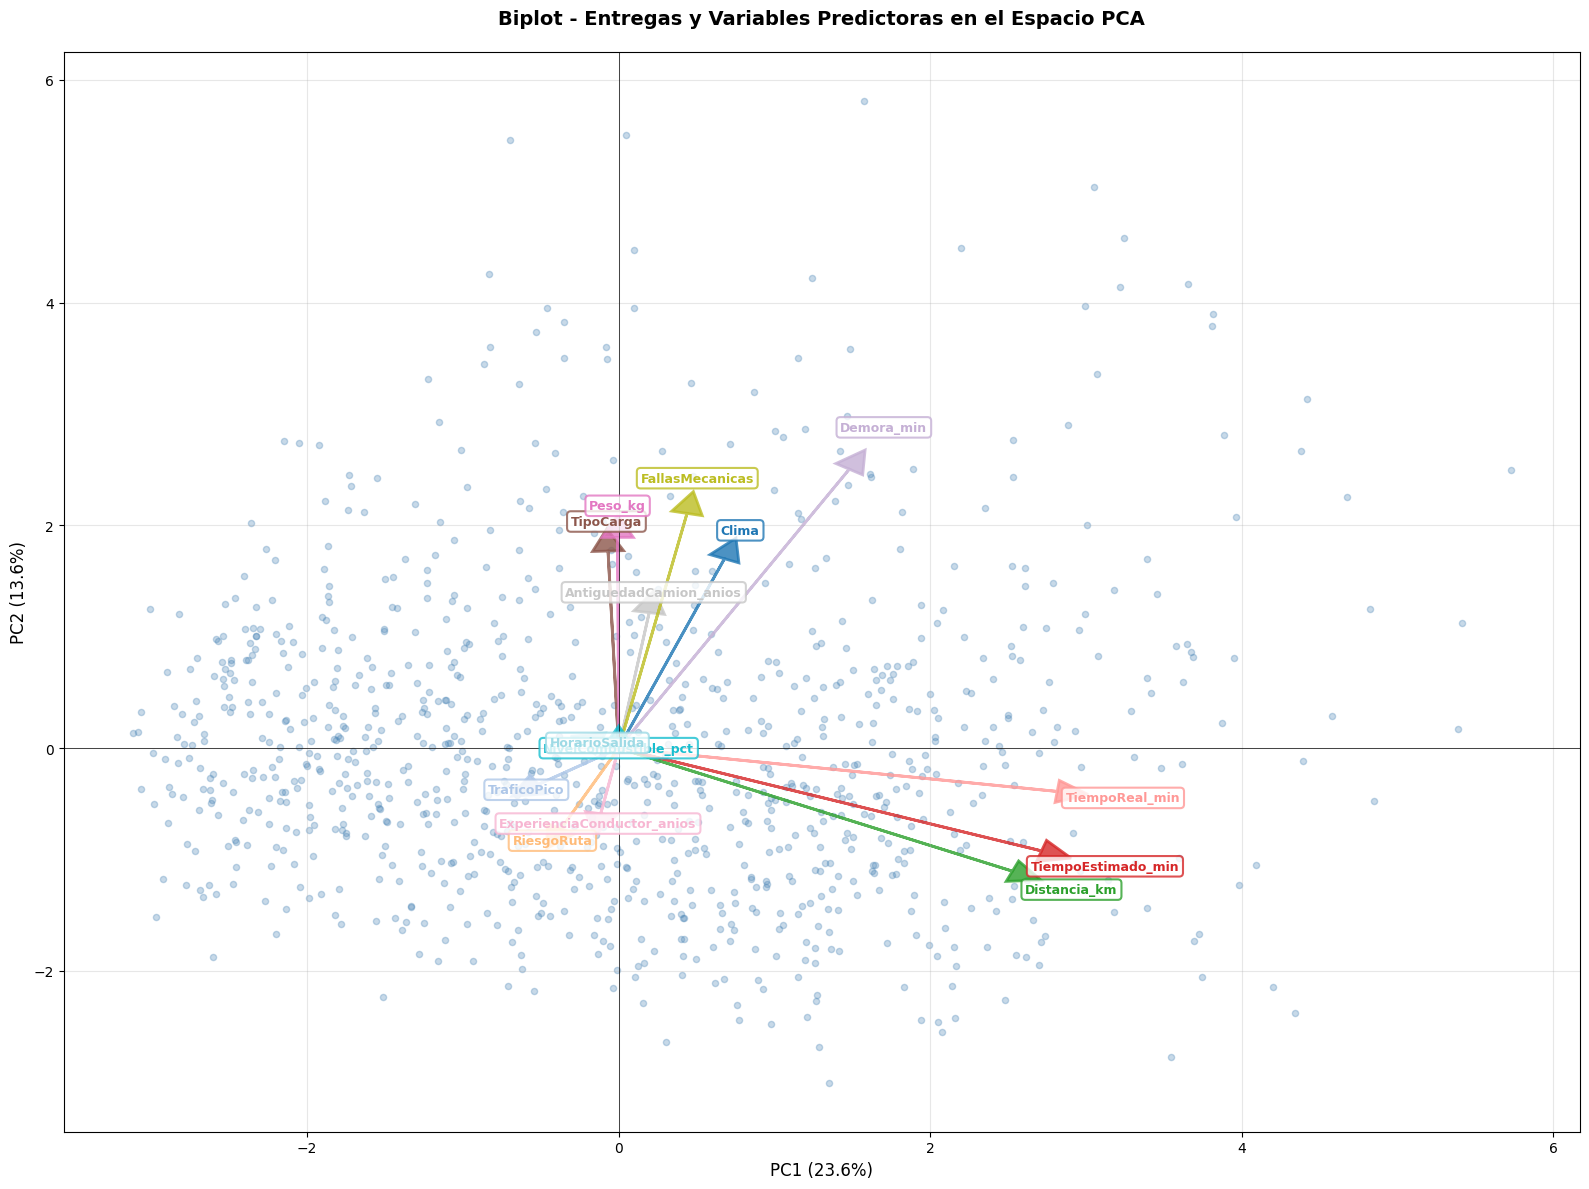


INTERPRETACIÓN DE LOS COMPONENTES PRINCIPALES

📊 COMPONENTE PRINCIPAL 1 (PC1)
   Varianza explicada: 23.56%
   Varianza acumulada: 23.56%

   🔍 Top 7 variables más influyentes:
      1. 📈 + TiempoReal_min                : +0.563
      2. 📈 + TiempoEstimado_min            : +0.543
      3. 📈 + Distancia_km                  : +0.506
      4. 📈 + Demora_min                    : +0.296
      5. 📈 + Clima                         : +0.136
      6. 📉 - TraficoPico                   : -0.103
      7. 📈 + FallasMecanicas               : +0.088

   💡 Interpretación:
      ➕ Asociado con:
         • TiempoReal_min (+0.563)
         • TiempoEstimado_min (+0.543)
         • Distancia_km (+0.506)

📊 COMPONENTE PRINCIPAL 2 (PC2)
   Varianza explicada: 13.65%
   Varianza acumulada: 37.21%

   🔍 Top 7 variables más influyentes:
      1. 📈 + Demora_min                    : +0.501
      2. 📈 + FallasMecanicas               : +0.422
      3. 📈 + Peso_kg                       : +0.378
      4. 📈 + TipoCar

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib

# 1. Cargar los datos
df = pd.read_csv('dataset_entregas_bn_numerico_actualizado.csv')

print("="*70)
print("ANÁLISIS PCA - SISTEMA DE ENTREGAS LOGÍSTICAS")
print("="*70)
print(f"\nDimensiones del dataset: {df.shape}")
print(f"Registros: {df.shape[0]} entregas")
print(f"Variables: {df.shape[1]} características")

print("\n📋 Columnas del dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n📊 Información del dataset:")
print(df.info())

print("\n📈 Primeras filas:")
print(df.head(10))

print("\n📉 Estadísticas descriptivas:")
print(df.describe())

# 2. Preparar datos para PCA (excluir solo la columna EntregaATiempo)
columnas_excluir = ['EntregaATiempo']
feature_columns = [col for col in df.columns if col not in columnas_excluir]

df_features = df[feature_columns]
print(f"\n🎯 Variables para PCA: {len(feature_columns)}")
print(f"Forma de datos: {df_features.shape}")
print(f"\n🚫 Columnas excluidas del análisis: {columnas_excluir}")

print("\n📊 Variables incluidas en el análisis:")
for i, col in enumerate(feature_columns, 1):
    unique_vals = df_features[col].nunique()
    print(f"{i:2d}. {col:30s} - {unique_vals} valores únicos")

# 3. Análisis de correlación inicial
print("\n" + "="*70)
print("ANÁLISIS DE CORRELACIÓN")
print("="*70)

correlation_matrix = df_features.corr()

# Encontrar las correlaciones más fuertes
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'var1': correlation_matrix.columns[i],
            'var2': correlation_matrix.columns[j],
            'correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('correlation', ascending=False, key=abs)

print("\n🔝 Top 10 correlaciones más fuertes:")
for idx, row in corr_df.head(10).iterrows():
    print(f"   {row['var1']:30s} ↔ {row['var2']:30s}: {row['correlation']:+.3f}")

# 4. Visualizar matriz de correlación
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True, linewidths=0.5,
            cbar_kws={'label': 'Correlación', 'shrink': 0.8})
plt.title('Matriz de Correlación - Variables de Entregas\n(Sin variable objetivo)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. Crear Pipeline completo para PCA
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

# Ajustar el pipeline
pca_pipeline.fit(df_features)

# 6. Análisis de varianza explicada
pca_full = pca_pipeline.named_steps['pca']
varianza_explicada = pca_full.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("\n" + "="*70)
print("ANÁLISIS DE VARIANZA EXPLICADA")
print("="*70)

for i, (var, var_acum) in enumerate(zip(varianza_explicada, varianza_acumulada), 1):
    bar = "█" * int(var * 50)
    print(f"PC{i:2d}: {var*100:5.2f}% {bar:20s} (Acum: {var_acum*100:5.2f}%)")

# 7. Determinar número óptimo de componentes
n_componentes_80 = np.argmax(varianza_acumulada >= 0.80) + 1
n_componentes_90 = np.argmax(varianza_acumulada >= 0.90) + 1
n_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1

print(f"\n🎯 Componentes necesarios:")
print(f"   • 80% de varianza: {n_componentes_80} componentes")
print(f"   • 90% de varianza: {n_componentes_90} componentes")
print(f"   • 95% de varianza: {n_componentes_95} componentes")

# 8. Visualización de varianza explicada
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico 1: Barras de varianza individual
bars = axes[0, 0].bar(range(1, len(varianza_explicada) + 1), 
                      varianza_explicada * 100, 
                      alpha=0.7, color='steelblue', edgecolor='darkblue')
axes[0, 0].set_xlabel('Componente Principal', fontsize=11)
axes[0, 0].set_ylabel('Varianza Explicada (%)', fontsize=11)
axes[0, 0].set_title('Varianza Explicada por Componente', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(1, len(varianza_explicada) + 1))

# Añadir valores sobre las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height > 2:  # Solo mostrar si es > 2%
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# Gráfico 2: Varianza acumulada
axes[0, 1].plot(range(1, len(varianza_acumulada) + 1), 
                varianza_acumulada * 100, 
                'o-', markersize=6, linewidth=2, color='darkgreen')
axes[0, 1].axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80% varianza')
axes[0, 1].axhline(y=90, color='red', linestyle='--', alpha=0.7, label='90% varianza')
axes[0, 1].axhline(y=95, color='purple', linestyle='--', alpha=0.7, label='95% varianza')
axes[0, 1].set_xlabel('Número de Componentes', fontsize=11)
axes[0, 1].set_ylabel('Varianza Acumulada (%)', fontsize=11)
axes[0, 1].set_title('Varianza Acumulada', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(range(1, len(varianza_acumulada) + 1))

# Gráfico 3: Scree plot
axes[1, 0].plot(range(1, len(varianza_explicada) + 1), 
                varianza_explicada * 100, 
                'o-', markersize=8, linewidth=2, color='crimson')
axes[1, 0].set_xlabel('Componente Principal', fontsize=11)
axes[1, 0].set_ylabel('Varianza Explicada (%)', fontsize=11)
axes[1, 0].set_title('Scree Plot - Criterio del Codo', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(1, len(varianza_explicada) + 1))

# Gráfico 4: Componentes vs Reducción Dimensional
reduction_pct = (1 - np.arange(1, len(varianza_explicada) + 1) / len(varianza_explicada)) * 100
axes[1, 1].plot(range(1, len(varianza_explicada) + 1), 
                reduction_pct, 
                's-', markersize=6, linewidth=2, color='purple')
axes[1, 1].set_xlabel('Número de Componentes', fontsize=11)
axes[1, 1].set_ylabel('Reducción Dimensional (%)', fontsize=11)
axes[1, 1].set_title('Reducción de Dimensionalidad', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(range(1, len(varianza_explicada) + 1))

plt.tight_layout()
plt.show()

# 9. Crear pipeline optimizado con número de componentes seleccionado
n_componentes_seleccionados = n_componentes_90

pca_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_componentes_seleccionados))
])

# Transformar datos
df_pca = pca_optimized.fit_transform(df_features)

print(f"\n✅ Pipeline optimizado creado con {n_componentes_seleccionados} componentes")
print(f"📊 Dimensiones después de PCA: {df_pca.shape}")
print(f"📉 Reducción dimensional: {df_features.shape[1]} → {df_pca.shape[1]} variables")
print(f"📈 Reducción: {(1 - df_pca.shape[1]/df_features.shape[1])*100:.1f}%")

# 10. Crear DataFrame con componentes principales
columnas_pca = [f'PC{i+1}' for i in range(n_componentes_seleccionados)]
df_pca_resultado = pd.DataFrame(df_pca, columns=columnas_pca)

print("\n📋 Primeras filas del dataset transformado:")
print(df_pca_resultado.head(10))

print("\n📊 Estadísticas de los componentes principales:")
print(df_pca_resultado[columnas_pca].describe())

# 11. Análisis de cargas (loadings)
pca_reducido = pca_optimized.named_steps['pca']
loadings = pd.DataFrame(
    pca_reducido.components_.T,
    columns=columnas_pca,
    index=feature_columns
)

print("\n" + "="*70)
print("CARGAS DE LAS VARIABLES EN LOS COMPONENTES PRINCIPALES")
print("="*70)
print(loadings.round(3))

# 12. Identificar variables más influyentes por componente
print("\n" + "="*70)
print("VARIABLES MÁS INFLUYENTES POR COMPONENTE")
print("="*70)

for i, col in enumerate(columnas_pca, 1):
    print(f"\n🔍 {col} (Varianza: {pca_reducido.explained_variance_ratio_[i-1]*100:.2f}%):")
    top_loadings = loadings[col].abs().sort_values(ascending=False).head(5)
    for j, (var, loading) in enumerate(top_loadings.items(), 1):
        signo = "+" if loadings.loc[var, col] > 0 else "-"
        print(f"   {j}. {signo} {var:30s}: {abs(loadings.loc[var, col]):.3f}")

# 13. Visualización de cargas
n_plots = min(4, n_componentes_seleccionados)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i in range(n_plots):
    col = columnas_pca[i]
    loadings_sorted = loadings[col].sort_values()
    
    colors = ['red' if x < 0 else 'green' for x in loadings_sorted.values]
    
    axes[i].barh(range(len(loadings_sorted)), loadings_sorted.values, color=colors, alpha=0.7)
    axes[i].set_yticks(range(len(loadings_sorted)))
    axes[i].set_yticklabels(loadings_sorted.index, fontsize=8)
    axes[i].set_xlabel('Carga', fontsize=10)
    axes[i].set_title(f'{col} - Varianza: {pca_reducido.explained_variance_ratio_[i]*100:.2f}%',
                     fontsize=11, fontweight='bold')
    axes[i].axvline(x=0, color='black', linewidth=0.5)
    axes[i].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# 14. Heatmap de cargas
plt.figure(figsize=(16, 12))
sns.heatmap(loadings, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Carga'},
            annot_kws={'size': 8})
plt.title('Cargas de las Variables en los Componentes Principales\n(Sistema de Entregas - Variables Predictoras)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Componentes Principales', fontsize=12)
plt.ylabel('Variables Originales', fontsize=12)
plt.tight_layout()
plt.show()

# 15. Scatter plots de los primeros componentes
if n_componentes_seleccionados >= 2:
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # PC1 vs PC2 simple
    axes[0].scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.6, s=30, c='steelblue')
    axes[0].set_xlabel(f'PC1 ({pca_reducido.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
    axes[0].set_ylabel(f'PC2 ({pca_reducido.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
    axes[0].set_title('Entregas en el Espacio PC1-PC2', 
                     fontsize=12, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].axhline(y=0, color='k', linewidth=0.5, alpha=0.5)
    axes[0].axvline(x=0, color='k', linewidth=0.5, alpha=0.5)
    
    # Densidad con hexbin
    hb = axes[1].hexbin(df_pca[:, 0], df_pca[:, 1], gridsize=30, cmap='Blues', alpha=0.7)
    axes[1].set_xlabel(f'PC1 ({pca_reducido.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
    axes[1].set_ylabel(f'PC2 ({pca_reducido.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
    axes[1].set_title('Densidad de Entregas en PC1-PC2', 
                     fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].axhline(y=0, color='k', linewidth=0.5, alpha=0.5)
    axes[1].axvline(x=0, color='k', linewidth=0.5, alpha=0.5)
    plt.colorbar(hb, ax=axes[1], label='Densidad')
    
    plt.tight_layout()
    plt.show()

# 16. Biplot mejorado
if n_componentes_seleccionados >= 2:
    def crear_biplot_entregas(score, coeff, labels, pc1=0, pc2=1):
        fig, ax = plt.subplots(figsize=(16, 12))
        
        # Scatter de observaciones
        xs = score[:, pc1]
        ys = score[:, pc2]
        
        ax.scatter(xs, ys, alpha=0.3, s=20, c='steelblue')
        
        # Escalar vectores para mejor visualización
        scale_factor = 5
        
        # Vectores de variables
        n_vars = len(labels)
        colors_vars = plt.cm.tab20(np.linspace(0, 1, n_vars))
        
        for i, (label, color) in enumerate(zip(labels, colors_vars)):
            ax.arrow(0, 0, coeff[i, pc1]*scale_factor, coeff[i, pc2]*scale_factor,
                    color=color, alpha=0.8, head_width=0.2, head_length=0.2,
                    linewidth=2)
            
            ax.text(coeff[i, pc1]*scale_factor*1.15, 
                   coeff[i, pc2]*scale_factor*1.15,
                   label, color=color, ha='center', va='center', 
                   fontsize=9, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                           alpha=0.8, edgecolor=color, linewidth=1.5))
        
        ax.set_xlabel(f'PC{pc1+1} ({pca_reducido.explained_variance_ratio_[pc1]*100:.1f}%)', 
                     fontsize=12)
        ax.set_ylabel(f'PC{pc2+1} ({pca_reducido.explained_variance_ratio_[pc2]*100:.1f}%)', 
                     fontsize=12)
        ax.set_title('Biplot - Entregas y Variables Predictoras en el Espacio PCA',
                    fontsize=14, fontweight='bold', pad=20)
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linewidth=0.5)
        ax.axvline(x=0, color='k', linewidth=0.5)
        
        plt.tight_layout()
        plt.show()
    
    crear_biplot_entregas(df_pca, pca_reducido.components_.T, feature_columns)

# 17. Interpretación de componentes
print("\n" + "="*70)
print("INTERPRETACIÓN DE LOS COMPONENTES PRINCIPALES")
print("="*70)

for i in range(min(5, n_componentes_seleccionados)):
    print(f"\n{'='*70}")
    print(f"📊 COMPONENTE PRINCIPAL {i+1} (PC{i+1})")
    print(f"{'='*70}")
    print(f"   Varianza explicada: {pca_reducido.explained_variance_ratio_[i]*100:.2f}%")
    print(f"   Varianza acumulada: {np.sum(pca_reducido.explained_variance_ratio_[:i+1])*100:.2f}%")
    
    cargas_comp = loadings.iloc[:, i]
    cargas_abs = cargas_comp.abs().sort_values(ascending=False)
    
    print(f"\n   🔍 Top 7 variables más influyentes:")
    for j, var in enumerate(cargas_abs.head(7).index, 1):
        carga = cargas_comp[var]
        signo = "📈 +" if carga > 0 else "📉 -"
        print(f"      {j}. {signo} {var:30s}: {carga:+.3f}")
    
    # Interpretación
    print(f"\n   💡 Interpretación:")
    top_positive = cargas_comp[cargas_comp > 0.2].sort_values(ascending=False)
    top_negative = cargas_comp[cargas_comp < -0.2].sort_values()
    
    if len(top_positive) > 0:
        print(f"      ➕ Asociado con:")
        for var, val in top_positive.head(3).items():
            print(f"         • {var} ({val:+.3f})")
    
    if len(top_negative) > 0:
        print(f"      ➖ Inversamente asociado con:")
        for var, val in top_negative.head(3).items():
            print(f"         • {var} ({val:+.3f})")

# 18. Análisis de calidad de la reducción
datos_reconstruidos = pca_optimized.inverse_transform(df_pca)
errores_por_variable = np.mean((df_features.values - datos_reconstruidos)**2, axis=0)
error_promedio = np.mean(errores_por_variable)

print(f"\n" + "="*70)
print("CALIDAD DE LA REDUCCIÓN DIMENSIONAL")
print("="*70)
print(f"📊 Error cuadrático medio general: {error_promedio:.6f}")
print(f"📈 Varianza preservada: {np.sum(pca_reducido.explained_variance_ratio_)*100:.2f}%")
print(f"📉 Varianza perdida: {(1-np.sum(pca_reducido.explained_variance_ratio_))*100:.2f}%")

print("\n🔍 Errores de reconstrucción por variable:")
error_df = pd.DataFrame({
    'Variable': feature_columns,
    'Error MSE': errores_por_variable
}).sort_values('Error MSE', ascending=False)

for idx, row in error_df.head(10).iterrows():
    print(f"   {row['Variable']:30s}: {row['Error MSE']:.6f}")

# 19. Exportar resultados
print(f"\n" + "="*70)
print("EXPORTANDO RESULTADOS")
print("="*70)

# Guardar proyección
df_pca_resultado.to_csv("entregas_pca_projection.csv", index=False)
print("✅ entregas_pca_projection.csv - Datos proyectados")

# Guardar cargas
loadings.round(4).to_csv("entregas_pca_loadings.csv")
print("✅ entregas_pca_loadings.csv - Cargas de variables")

# Guardar métricas
metrics_df = pd.DataFrame({
    'Component': columnas_pca,
    'Explained_Variance': pca_reducido.explained_variance_ratio_,
    'Explained_Variance_Cumulative': np.cumsum(pca_reducido.explained_variance_ratio_)
})
metrics_df.to_csv("entregas_pca_metrics.csv", index=False)
print("✅ entregas_pca_metrics.csv - Métricas de varianza")

# Guardar pipeline
joblib.dump(pca_optimized, 'entregas_pca_pipeline.joblib')
print("✅ entregas_pca_pipeline.joblib - Pipeline completo")

# Guardar matriz de correlación
correlation_matrix.to_csv("entregas_correlation_matrix.csv")
print("✅ entregas_correlation_matrix.csv - Matriz de correlación")

# 20. Resumen ejecutivo
print(f"\n" + "="*70)
print("📋 RESUMEN EJECUTIVO")
print("="*70)
print(f"Dataset original: {df.shape[0]} registros × {df.shape[1]} variables")
print(f"Variables analizadas: {len(feature_columns)} (excluyendo variable objetivo)")
print(f"Componentes seleccionados: {n_componentes_seleccionados}")
print(f"Reducción dimensional: {(1 - n_componentes_seleccionados/len(feature_columns))*100:.1f}%")
print(f"Varianza preservada: {np.sum(pca_reducido.explained_variance_ratio_)*100:.2f}%")
print(f"\n🎯 El análisis PCA ha reducido {len(feature_columns)} variables predictoras a {n_componentes_seleccionados}")
print(f"   componentes principales, preservando el {np.sum(pca_reducido.explained_variance_ratio_)*100:.1f}%")
print(f"   de la varianza total de los datos.")

print(f"\n✨ ANÁLISIS COMPLETADO EXITOSAMENTE ✨")